TODO: Powiększ dataset! Z jakiegoś powodu jest tu tylko 395 ligandów

In [1]:
import logging
import pathlib
import shutil
import sys
logging.basicConfig()
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tdc import Evaluator
import numpy as np

sys.path.append('..')
from sbap.sdf import ChemblSdfReader
from sbap.featurizers.prolif_smina import SminaDockingPersistenceHandler, SminaConfig, DockedProlifFingerprintFeaturizer, SminaDockingScoreFeaturizer

In [2]:
sdf_file = pathlib.Path("../molecules/human_serum_albumin_CHEMBL_data.sdf")
protein_pdb_file = pathlib.Path("../molecules/4la0_human_serum_albumin_cleaned_without_ligand.pdb")
docked_ligands_target_directory = pathlib.Path("../molecules/albumin")

fingerprint_featurizer = DockedProlifFingerprintFeaturizer.create(
    logging_level=logging.INFO,
)
docking_score_featurizer = SminaDockingScoreFeaturizer(logging.INFO)

In [3]:
fingerprint_featurizer.fit(protein_pdb_file, docked_ligands_target_directory)

  0%|          | 0/395 [00:00<?, ?it/s]

In [4]:
X, y = fingerprint_featurizer.transform(protein_pdb_file, docked_ligands_target_directory)
X.shape

  0%|          | 0/395 [00:00<?, ?it/s]

INFO:ProlifInteractionFingerprintGenerator:Receptor interactions found: Index(['GLU37.A HBDonor', 'GLU37.A CustomVdWContact', 'ASP108.A HBDonor',
       'ASP108.A Cationic', 'ASP108.A CustomVdWContact',
       'LEU112.A CustomVdWContact', 'PRO113.A HBDonor',
       'PRO113.A CustomVdWContact', 'ARG114.A HBDonor',
       'ARG114.A CustomVdWContact', 'LEU115.A Hydrophobic', 'LEU115.A HBDonor',
       'LEU115.A CustomVdWContact', 'VAL116.A CustomVdWContact',
       'ARG117.A HBDonor', 'ARG117.A CustomVdWContact',
       'PRO118.A CustomVdWContact', 'VAL122.A CustomVdWContact',
       'MET123.A Hydrophobic', 'MET123.A CustomVdWContact',
       'ALA126.A CustomVdWContact', 'ASN130.A CustomVdWContact',
       'PHE134.A Hydrophobic', 'PHE134.A HBDonor', 'PHE134.A CationPi',
       'PHE134.A CustomVdWContact', 'LYS137.A CustomVdWContact',
       'TYR138.A Hydrophobic', 'TYR138.A HBDonor', 'TYR138.A CustomVdWContact',
       'GLU141.A HBDonor', 'GLU141.A Cationic', 'GLU141.A CustomVdWContact',


(395, 64)

### Transform data to logarithmic scale

[ 78.8   92.2   94.1   99.76  99.8   96.6   96.1   97.    56.9   94.4
  68.    99.9   98.4   98.    93.7   17.8   21.    92.9   87.1   97.9
  58.    97.7   97.8   93.7   93.7   93.7   90.4   96.    96.1   97.6
 100.    94.9   93.2   46.5   85.3    5.    88.    35.    96.2   94.
   2.2   37.5   93.3   99.8   94.    76.    96.5    1.6   74.4   94.9
  87.5   92.28  89.9   98.9   91.    70.2   96.    99.9   93.    89.9
  98.5   94.    99.5   98.5    7.8   89.2   10.9   97.5   99.2   99.5
  99.9   98.5   99.1   96.3   96.    91.    78.    94.3   97.8   91.
  88.    75.    99.5   93.7   93.7   93.7   93.7   93.7   93.7   99.
  90.    85.9   85.1   96.7   58.    97.    76.    96.7   96.9   10.
  62.    68.    85.9    6.8   98.3   98.19  97.    89.    72.    86.
  84.4   95.4   95.    93.7   79.    99.2   85.    95.8   78.    94.
  98.2   92.2   98.3   91.9   62.5   76.    72.4    5.    95.    96.4
  97.1   51.    96.4   98.5   88.7   96.2   44.2   87.4   94.09  95.3
  97.8   97.1   91.    85.

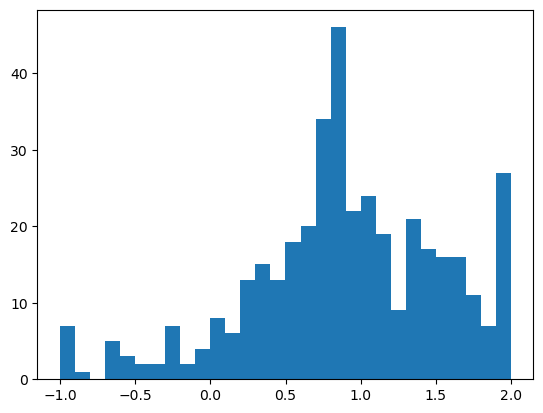

In [7]:
dataset_siz = X.shape[0]
y = np.array(y, dtype='f')
print(y)
log_y = np.log10(100.1 - y)
print(log_y)
plt.hist(log_y, bins=30)
plt.show()
y = log_y

Czy liczba zapalonych bitów fingerprintu koreluje z docking score? Chyba tak

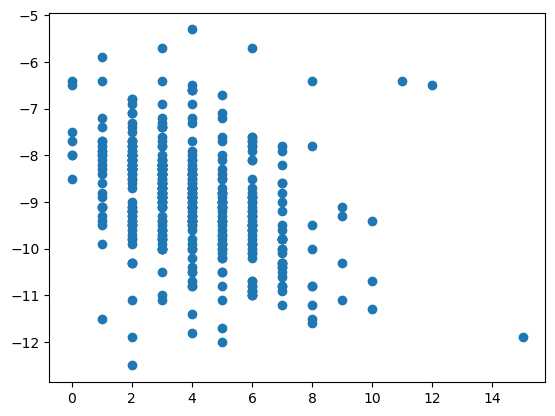

In [8]:
A = np.sum(X[:, 1:], axis=1)
plt.scatter(A, X[:, 0])
plt.show()

### One can try to make the number of fingerprints smaller (e.g. if only one ligand has bit nr 37 on, remove it)

In [53]:
print(np.sum(X, axis=0))

[-3.5363e+03  7.0000e+00  4.0000e+00  1.0000e+00  3.8000e+01  3.0000e+00
  1.0000e+00  5.0000e+00  1.0000e+00  8.4000e+01  5.0000e+00  7.0000e+00
  1.0000e+00  2.0000e+00  1.0000e+00  2.0000e+00  1.3000e+01  1.0000e+00
  1.0000e+00  1.0000e+00  4.0000e+01  1.0000e+00  1.7000e+01  2.0000e+00
  5.0000e+01  1.0000e+00  3.7000e+01  2.0000e+00  9.6000e+01  6.6000e+01
  1.2000e+01  4.8000e+01  7.2000e+01  3.0000e+00  1.0000e+00  4.6000e+01
  1.2000e+01  3.0000e+00  2.0000e+00  1.8000e+01  1.9000e+01  3.0000e+00
  1.0800e+02  2.4000e+01  1.3900e+02  1.6000e+01  4.0000e+00  1.6000e+01
  1.0000e+00  1.0000e+01  3.6000e+01  2.0000e+00  1.0000e+00  2.0000e+00
  1.0000e+00  1.0000e+00  1.0000e+00  1.6300e+02  1.3000e+01  2.9500e+02
  2.6000e+01  2.0000e+00  5.0000e+00  1.0000e+00]


In [61]:
CUTOFF_THRESHOLD = 5

sums = np.sum(X, axis=0)
good_idces = np.argwhere(sums > CUTOFF_THRESHOLD).flatten()
print(good_idces)
# X = X[:, good_idces]
print(f'now every input vector has {X.shape[1]} bits and on average {np.sum(X[:, 1:]) / dataset_siz} of them is a 1')
print(f'example numbers of 1-bits: {np.sum(X, axis=1)[:20]}')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
rmse = Evaluator(name = 'RMSE')
mae = Evaluator(name = 'MAE')
r_squared = Evaluator(name = 'R2')

In [66]:
def test_model(model):
    model.fit(x_train, y_train)

    predictions = model.predict(x_train)  
    rmse_score = rmse(y_train, predictions)
    mae_score = mae(y_train, predictions)
    r2_score = r_squared(y_train, predictions)
    print(f'on train set: RMSE, MAE, R2 = {rmse_score}, {mae_score}, {r2_score}')
    plt.scatter(y_train, predictions)

    predictions = model.predict(x_test) 
    rmse_score = rmse(y_test, predictions)
    mae_score = mae(y_test, predictions)
    r2_score = r_squared(y_test, predictions)
    print(f'on test set: RMSE, MAE, R2 = {rmse_score}, {mae_score}, {r2_score}')
    plt.scatter(y_test, predictions)
    plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


on train set: RMSE, MAE, R2 = 0.3585128954655847, 0.26000712329112663, 0.7019249372921534
on test set: RMSE, MAE, R2 = 0.6038992534299494, 0.473347797278541, 0.07210819047985928


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


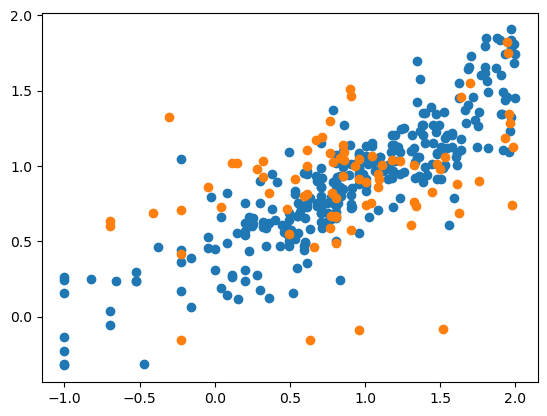

In [67]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

model = RandomForestRegressor(n_estimators=300, min_samples_leaf=2, verbose=1)
# model = RandomForestRegressor()
test_model(model)

TODO: try buckets for decision tree

on train set: RMSE, MAE, R2 = 0.32616588431690285, 0.23739351698332947, 0.7532863673247734
on test set: RMSE, MAE, R2 = 0.8908807275772251, 0.6603841873211774, -1.0193308663000056


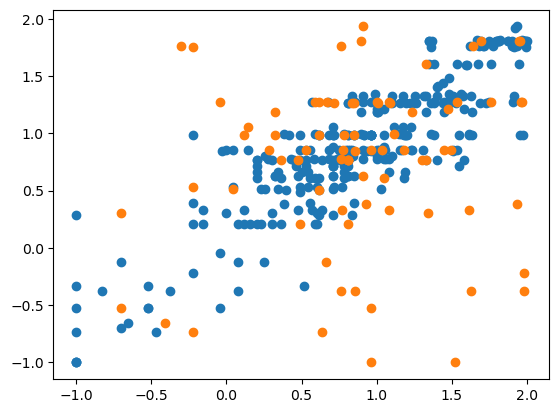

[Text(0.7714987362132353, 0.9761904761904762, 'x[0] <= -7.35\nsquared_error = 0.431\nsamples = 316\nvalue = 0.895'),
 Text(0.5724092371323529, 0.9285714285714286, 'x[0] <= -10.75\nsquared_error = 0.395\nsamples = 290\nvalue = 0.83'),
 Text(0.36121323529411764, 0.8809523809523809, 'x[16] <= 0.5\nsquared_error = 0.258\nsamples = 30\nvalue = 0.501'),
 Text(0.3318014705882353, 0.8333333333333334, 'x[20] <= 0.5\nsquared_error = 0.197\nsamples = 26\nvalue = 0.416'),
 Text(0.3170955882352941, 0.7857142857142857, 'x[31] <= 0.5\nsquared_error = 0.161\nsamples = 25\nvalue = 0.375'),
 Text(0.3023897058823529, 0.7380952380952381, 'x[9] <= 0.5\nsquared_error = 0.133\nsamples = 18\nvalue = 0.263'),
 Text(0.28768382352941174, 0.6904761904761905, 'x[4] <= 0.5\nsquared_error = 0.119\nsamples = 12\nvalue = 0.13'),
 Text(0.27297794117647056, 0.6428571428571429, 'squared_error = 0.062\nsamples = 11\nvalue = 0.206'),
 Text(0.3023897058823529, 0.6428571428571429, 'squared_error = 0.0\nsamples = 1\nvalue = -

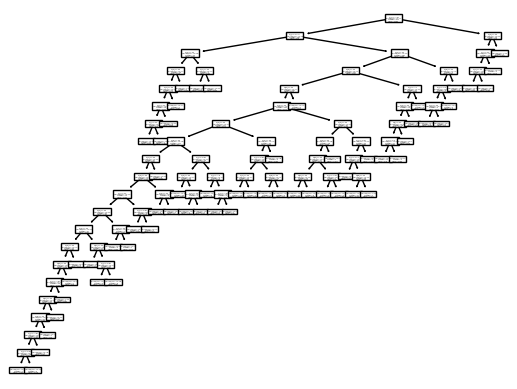

In [77]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tr = DecisionTreeRegressor(ccp_alpha=0.002)
test_model(tr)
plot_tree(tr)

on train set: RMSE, MAE, R2 = 0.01051282493375653, 0.00211356239558398, 0.9738966769214074
on test set: RMSE, MAE, R2 = 0.06413212159084083, 0.04595519239905697, 0.012111517968016683


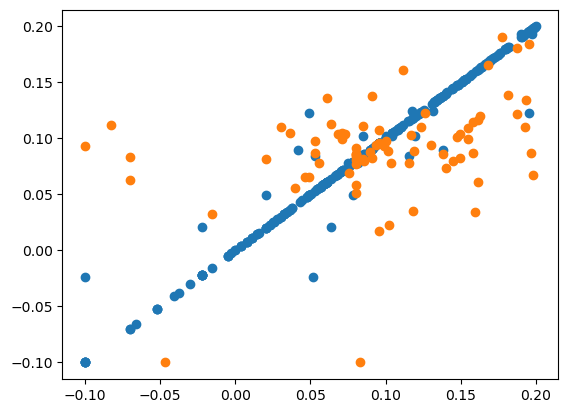

on train set: RMSE, MAE, R2 = 0.05413527184095296, 0.01110556898520717, 0.9726828888941486
on test set: RMSE, MAE, R2 = 0.3222506558647007, 0.24640196744261006, -0.034965833212043496


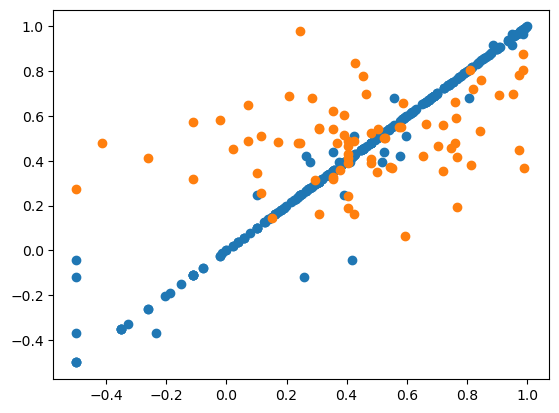

on train set: RMSE, MAE, R2 = 0.20181704195548478, 0.04013091901057883, 0.9768840338162372
on test set: RMSE, MAE, R2 = 1.2149058233693923, 0.9387273030255562, -0.041767606153453984


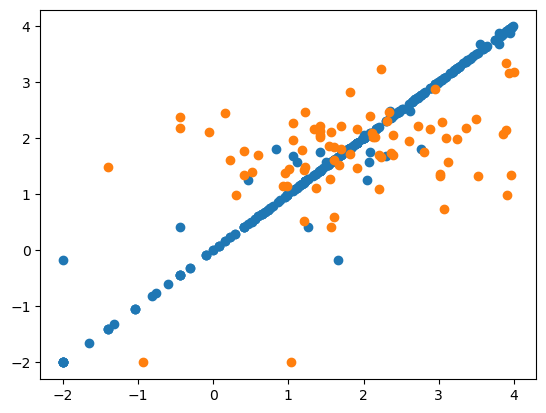

on train set: RMSE, MAE, R2 = 0.470759025883213, 0.10065104652054702, 0.979709730263864
on test set: RMSE, MAE, R2 = 3.1817721385715227, 2.218915606099175, -0.09400736809276511


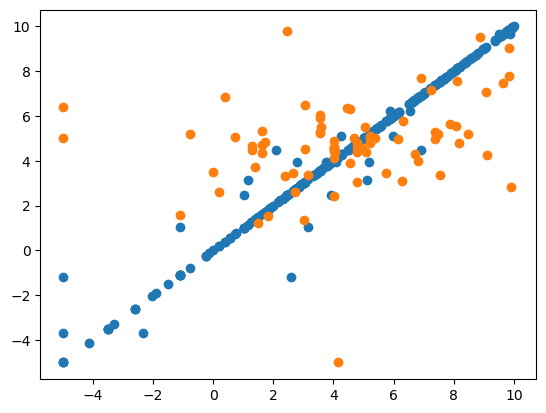

In [113]:
from sklearn.neighbors import KNeighborsRegressor

for alpha in [0.1, 0.5, 2.0, 5.0]:
    y_alpha = alpha * y
    x_train, x_test, y_train, y_test = train_test_split(X, y_alpha, test_size=0.2)
    model = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='l2')
    test_model(model)

on train set: RMSE, MAE, R2 = 0.26987068318792173, 0.1751090068376566, 0.8275261810921999
on test set: RMSE, MAE, R2 = 0.7017259319385649, 0.5380120154804819, -0.14828013437636667


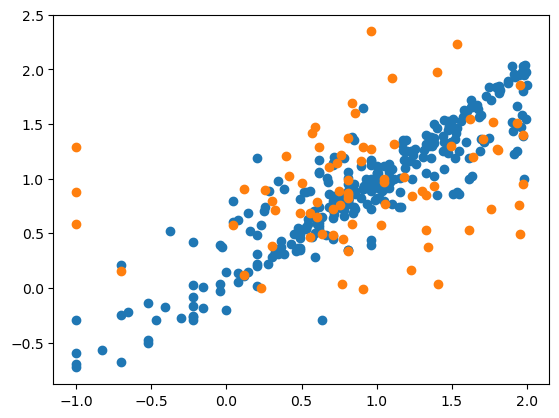

In [111]:
from sklearn.neural_network import MLPRegressor

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
nn = MLPRegressor(hidden_layer_sizes=(100, 50, 10), alpha=0.002)
test_model(nn)